# GRIP : The Sparks Foundation

# Author : Utkaarsh Bhaskarwar

# Task 1 - Prediction using  Supervised ML

In this regressor model we need to predict the percentage of an student based on the no. of study hours.
This is a simple linear regression model involving just 2 variables, Hours and Scores


## IMPORTING THE LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## IMPORTING THE DATASET

In [33]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

## EXPLORING THE DATASET

In [34]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
data.shape

(25, 2)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## PLOTTING THE DISTRIBUTIONS

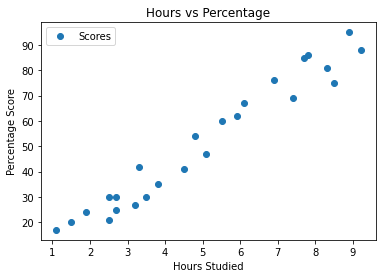

In [36]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## PREPARING THE DATA

In [9]:
x=data.drop('Scores',axis=1)
y=data['Scores']

## SPLITTING THE DATASET INTO TRAINING AND TEST DATA

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [39]:
x_train

,Hours
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2
18,6.1
4,3.5
9,2.7
7,5.5


In [40]:
x_train.shape

(16, 1)

In [41]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9
22,3.8
17,1.9
24,7.8
23,6.9


In [42]:
x_test.shape

(9, 1)

## TRAINING THE MODEL ON TRAIN DATA

In [43]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred=le.predict(x_test)
y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,17.042892
2,27,33.516954
19,69,74.217577
16,30,26.733516
11,62,59.681640
22,35,39.331329
17,24,20.919142
24,86,78.093827
23,76,69.372265


## VISUALISING THE TRAINING SET RESULTS

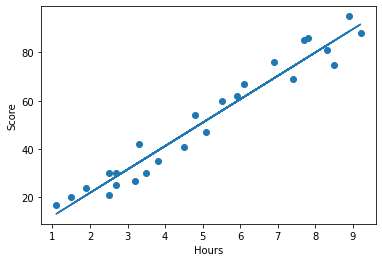

In [46]:
line = le.coef_*x+le.intercept_

plt.scatter(x,y)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.plot(x,line)
plt.show()

## PREDICTING THE TEST RESULTS
### ACCURACY OF OUR MODEL

In [47]:
le.score(x_train,y_train)

0.9501107277744313

## PREDICTING RESULTS FOR 9.25 HOURS OF STUDY

In [50]:
hours = 9.25
own_pred = le.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.14523314523314


## EVALUATION OF MODEL

In [49]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.691397441397438
